In [1]:
using Pkg; Pkg.activate("..")\
using OceanTurb, OceanTurb.Diffusion, OceanTurb.Plotting, PyPlot, LinearAlgebra

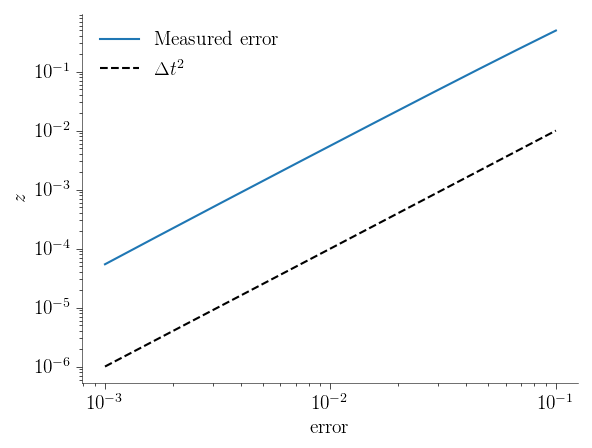

PyObject <matplotlib.legend.Legend object at 0x11cffbef0>

In [3]:
# First, we define the model.
model = Diffusion.Model(N=100, L=π/2, K=1.0)
z = model.grid.zc
    
c_init(z) = cos(2z)
c_ans(z, t) = exp(-4t) * c_init(z)

function c_err(model, dt, nt=1)
    model.solution.c = c_init
    reset!(model.clock)
    iterate!(model, dt, nt)
    norm(c_ans.(z, model.clock.time) .- data(model.solution.c))
end

dt = 0.001:0.0001:0.1
errors = similar(dt)

for i in 1:length(dt)
    errors[i] = c_err(model, dt[i])
end

# Initialize plotting
ax, fig = subplots()
xlabel("error")
ylabel(L"z")
cornerspines()

plot(dt, errors, "-", label="Measured error")
plot(dt, dt.^2, "k--", label=L"\Delta t^2")

yscale("log")
xscale("log")
legend()